###Verisetini Okuma işlemi

In [0]:
import pandas as pd
import numpy as np
from numpy import array
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
## Setting up Pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark import sql
from pyspark.sql.types import DoubleType
from pyspark.sql import functions as F
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler

# File location and type
file_location = "/FileStore/tables/yellow_tripdata_2016_02.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)


print("Toplam Veri Sayısı:",df.count())

temp_table_name = "yellow_taxi"
df.createOrReplaceTempView(temp_table_name)

# MAGIC %md ###4- Yüklenen veri kümesinin şemasını yazdırılması

# COMMAND ----------

#df.printSchema()


NUMERICAL_FEATURES = ["pickup_longitude", 
                      "pickup_latitude",
                      "dropoff_longitude",
                      "dropoff_latitude",
                      "trip_distance",
                      "passenger_count"] 
                      
TARGET_VARIABLE = "fare_amount"

print("{:d} Numerical features = [{:s}]".format(len(NUMERICAL_FEATURES), ", ".join(["`{:s}`".format(nf) for nf in NUMERICAL_FEATURES])))
print("1 Target variable = `{:s}`".format(TARGET_VARIABLE))


# MAGIC %md ### 5- Veri kümesinin ilk 5 satırını görüntülenmesi

# COMMAND ----------

display(df)
    

Toplam Veri Sayısı: 1048524
6 Numerical features = [`pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, `dropoff_latitude`, `trip_distance`, `passenger_count`]
1 Target variable = `fare_amount`


VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
2,2016-02-25T17:24:20.000+0000,2016-02-25T17:27:20.000+0000,2,0.7,-73.94725036621094,40.763771057128906,1,N,-73.99201202392578,40.735389709472656,2,5.0,0.0,0.5,0.0,0.0,0.3,5.8
2,2016-02-25T23:10:50.000+0000,2016-02-25T23:31:50.000+0000,2,5.52,-73.98301696777344,40.75099182128906,1,N,-73.98858642578125,40.75883865356445,2,20.0,0.5,0.5,0.0,0.0,0.3,21.3
2,2016-02-01T00:00:01.000+0000,2016-02-01T00:10:52.000+0000,6,1.99,-73.99234008789062,40.758201599121094,1,N,-73.96435546875,40.75797653198242,1,9.5,0.5,0.5,0.7,0.0,0.3,11.5
1,2016-02-01T00:00:04.000+0000,2016-02-01T00:05:16.000+0000,1,1.5,-73.98145294189453,40.74972152709961,1,N,-73.9823226928711,40.76398468017578,2,6.5,0.5,0.5,0.0,0.0,0.3,7.8
2,2016-02-01T00:00:05.000+0000,2016-02-01T00:20:59.000+0000,1,5.6,-74.00060272216797,40.72975540161133,1,N,-73.95132446289062,40.66983413696289,1,20.0,0.5,0.5,4.0,0.0,0.3,25.3
2,2016-02-01T00:00:06.000+0000,2016-02-01T00:15:01.000+0000,1,4.69,-74.0051040649414,40.7190055847168,1,N,-73.94709014892578,40.68888473510742,2,16.0,0.5,0.5,0.0,0.0,0.3,17.3
2,2016-02-01T00:00:09.000+0000,2016-02-01T00:05:35.000+0000,1,1.45,-73.98600006103516,40.76214599609375,1,N,-73.99060821533203,40.74620819091797,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
2,2016-02-01T00:00:19.000+0000,2016-02-01T00:06:35.000+0000,1,1.1,-73.9663314819336,40.77342224121094,1,N,-73.95610809326172,40.78142166137695,2,6.5,0.5,0.5,0.0,0.0,0.3,7.8
2,2016-02-01T00:00:21.000+0000,2016-02-01T00:06:32.000+0000,1,1.96,-73.97655487060547,40.76569747924805,1,N,-73.97897338867188,40.744380950927734,1,7.5,0.5,0.5,1.0,0.0,0.3,9.8
2,2016-02-01T00:00:21.000+0000,2016-02-01T00:16:59.000+0000,2,4.5,-73.9765853881836,40.764930725097656,1,N,-73.91111755371094,40.7689094543457,2,16.0,0.5,0.5,0.0,0.0,0.3,17.3


In [0]:
# MAGIC %md ###6- Boş(Null) değerlerin kontrol edilmesi

# COMMAND ----------

#for c in df.columns:
   #print("`{:s}` satırındaki null değer sayısı = {:d}".format(c, df.where(col(c).isNull()).count()))

###Özelliklerimiz
Sütunların veri türleri, flooat değişken türü olarak değiştirilmelidir.

Yolculuk Bilgileri

pickup_longitude : sayacın devreye girdiği tarih ve saat

pickup_latitude : sayacın devre dışı bırakıldığı tarih ve saat

dropoff_longitude : Taksimetrenin devre dışı bırakıldığı boylam

dropoff_latitude : Taksimetrenin devre dışı bırakıldığı enlem

trip_duration : (hedef) saniye cinsinden yolculuk süresi

trip_distance: Taksimetre tarafından rapor edilen mil cinsinden geçen yolculuk mesafesi.

passenger_count: Yolcu sayısı

fare_amount= Toplam ödenen ücret

###Data Cleaning-Aykırı Değerlerin Kaldırılması

In [0]:
df = df.withColumn('pickup_longitude', df['pickup_longitude'].cast('float'))
df = df.withColumn('pickup_latitude', df['pickup_latitude'].cast('float'))
df = df.withColumn('dropoff_longitude', df['dropoff_longitude'].cast('float'))
df = df.withColumn('dropoff_latitude', df['dropoff_latitude'].cast('float'))
df = df.withColumn('trip_distance', df['trip_distance'].cast('float'))
df = df.withColumn('passenger_count', df['passenger_count'].cast('float'))
df = df.withColumn('total_amount', df['total_amount'].cast('float'))

#1 dakikadan az yolculukları sil
#trip_distancce Taksimetre tarafından rapor edilen mil cinsinden geçen yolculuk mesafesi.
#Yolcu sayısı 1 ve 6 dan büyükleri temizle
# Dropping boş satırları sil
df = df.na.drop()

df = df.filter("pickup_latitude>=40.53 and pickup_latitude<=40.88")
df = df.filter("trip_distance>=0.25 and trip_distance<31")
df = df.filter("pickup_longitude>=-74.09 and pickup_longitude<=-73.72")
df = df.filter("passenger_count>0 and passenger_count<7")
df = df.filter("total_amount>2.5 and total_amount<500")

#display(df)
print("Data Cleaning sonrası Toplam Veri Sayısı:",df.count())

Data Cleaning sonrası Toplam Veri Sayısı: 1022074


In [0]:
# COMMAND ----------

df.describe().toPandas()  #transpose işlemi yaparak tabloyu daha rahat okuyabiliyoruz.

,summary,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,count,1022074,1022074,1022074,1022074,1022074,1022074,1022074,1022074,1022074,1022074,1022074,1022074,1022074,1022074,1022074,1022074,1022074
1,mean,1.535661801395985,1.6363218318830144,2.7650902085880196,-73.97382175289091,40.75261245266539,1.0258357026986304,None,-73.95682735556316,40.74323839006273,1.3156650105569656,12.331690464682598,0.3331723926056235,0.4989041889334823,1.8264476446911098,0.2972442308482886,0.29998943325042815,15.587448347048415
2,stddev,0.49872685838825603,1.3164450335106619,3.399611351249578,0.03595493630657314,0.02637305021565864,0.3546981272801384,None,1.148040805015604,0.633055734086738,0.47512339674894716,9.81512800752484,0.46562403884384684,0.023381729325763583,2.375357375720132,1.360473236962606,0.0017804258805847282,12.390819304465111
3,min,1,1.0,0.25,-74.08766,40.577286,1,N,-83.158806,0.0,1,0.0,0.0,0.0,0.0,-5.54,0.0,2.8
4,max,2,6.0,30.95,-73.72405,40.87982,99,Y,0.0,42.186756,4,300.0,5.5,0.5,326.44,85.54,0.3,343.34


In [0]:
# Grafik kütüphanelerini kullanabilmek için önce PySpark DataFrame'imizi Pandas DataFrame'e dönüştürmemiz gerekiyor
pdf = df.toPandas()

#pdf['trip_duration'] = (pdf['tpep_dropoff_datetime'] - pdf['tpep_pickup_datetime']).dt.seconds

#pdf.info()

In [0]:
#Veri kümesindeki sayısal özelliklerle ilgili temel istatistikler

#pdf.describe()

In [0]:
#Kullanıllmayacak Sutunları temizle
pdf=pdf.drop(["improvement_surcharge"], axis='columns')
pdf=pdf.drop(["VendorID"], axis='columns')
pdf=pdf.drop(["RatecodeID"], axis='columns')
pdf=pdf.drop(["store_and_fwd_flag"], axis='columns')
pdf=pdf.drop(["extra"], axis='columns')
pdf=pdf.drop(["mta_tax"], axis='columns')
#pdf=pdf.drop(["tip_amount"], axis='columns')
pdf=pdf.drop(["tolls_amount"], axis='columns')
pdf=pdf.drop(["tpep_pickup_datetime"], axis='columns')
pdf=pdf.drop(["tpep_dropoff_datetime"], axis='columns')
pdf=pdf.drop(["payment_type"], axis='columns')
pdf=pdf.drop(["total_amount"], axis='columns')
pdf


,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount
0,2.0,0.70,-73.947250,40.763771,-73.992012,40.735390,5.0,0.00
1,2.0,5.52,-73.983017,40.750992,-73.988586,40.758839,20.0,0.00
2,6.0,1.99,-73.992340,40.758202,-73.964355,40.757977,9.5,0.70
3,1.0,1.50,-73.981453,40.749722,-73.982323,40.763985,6.5,0.00
4,1.0,5.60,-74.000603,40.729755,-73.951324,40.669834,20.0,4.00
...,...,...,...,...,...,...,...,...
1022069,1.0,1.00,-73.964867,40.759346,-73.953598,40.767387,6.5,2.05
1022070,1.0,0.45,-73.981400,40.780830,-73.976181,40.781075,4.0,0.00
1022071,1.0,0.50,-73.957169,40.768452,-73.956596,40.763008,5.0,2.04
1022072,2.0,0.99,-73.993820,40.741501,-73.984642,40.754189,9.5,2.00


###Veri Görselleştirmesi

/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


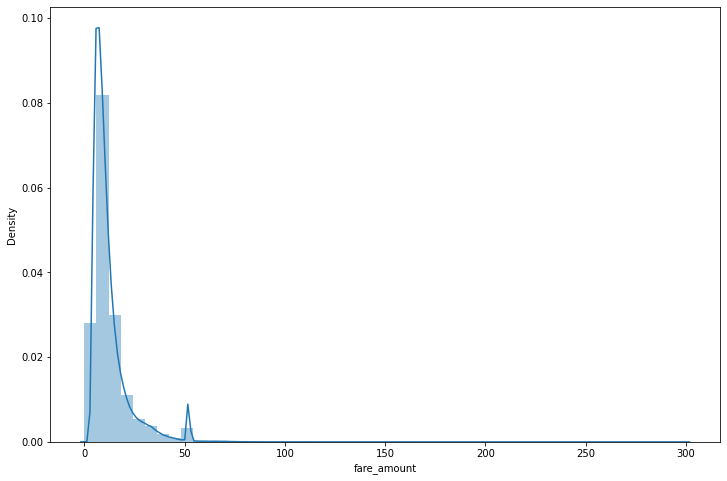

In [0]:
#Modelimizdeki hedef değişken ‘fare_amount’ olduğu için onun dağılımına bakıyoruz ve veri setinin geri kalanından ayırıyoruz.
plt.figure(figsize=(12,8))
X = pdf.drop(['fare_amount'], axis=1)
y = pdf['fare_amount']
sns.distplot(y)
plt.show()

/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

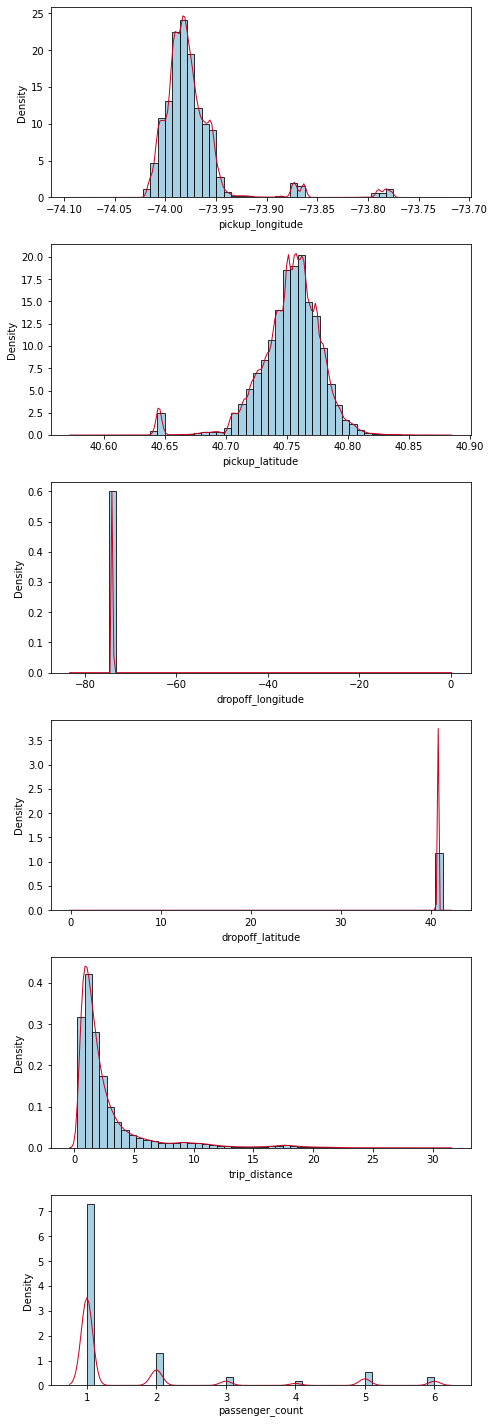

In [0]:
# COMMAND ----------

# MAGIC %md ##8- Veri Dağılımlarının Analizi: Sayısal Özellikler

# COMMAND ----------

# MAGIC %md ###Sayısal özelliklerin dağılımları

# COMMAND ----------

# Her sütunun değerlerinin yoğunluk dağılımının çizilmesi

n_rows = 6
n_cols = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(7,20))

for i,f in enumerate(NUMERICAL_FEATURES):
    _ = sns.distplot(pdf[f],
                    kde_kws={"color": "#ca0020", "lw": 1}, 
                    hist_kws={"histtype": "bar", "edgecolor": "k", "linewidth": 1,"alpha": 0.8, "color": "#92c5de"},
                    ax=axes[i]
                    )

fig.tight_layout(pad=1.5)

In [0]:

#rename columns
#rename specific column names
#pdf.rename(columns = {'pickup_longitude':'pickup_longitude', 'pickup_latitude':'pickup_latitude'}, inplace = True)
pdf

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tip_amount
0,2.0,0.70,-73.947250,40.763771,-73.992012,40.735390,5.0,0.00
1,2.0,5.52,-73.983017,40.750992,-73.988586,40.758839,20.0,0.00
2,6.0,1.99,-73.992340,40.758202,-73.964355,40.757977,9.5,0.70
3,1.0,1.50,-73.981453,40.749722,-73.982323,40.763985,6.5,0.00
4,1.0,5.60,-74.000603,40.729755,-73.951324,40.669834,20.0,4.00
...,...,...,...,...,...,...,...,...
1022069,1.0,1.00,-73.964867,40.759346,-73.953598,40.767387,6.5,2.05
1022070,1.0,0.45,-73.981400,40.780830,-73.976181,40.781075,4.0,0.00
1022071,1.0,0.50,-73.957169,40.768452,-73.956596,40.763008,5.0,2.04
1022072,2.0,0.99,-73.993820,40.741501,-73.984642,40.754189,9.5,2.00


/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


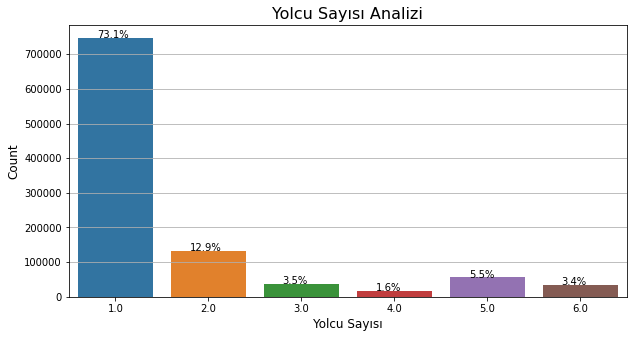

In [0]:
# Yolcu_sayısı verileri için veri dağılımını kontrol etme

fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(pdf.passenger_count, ax = ax)
ax.set_title('Yolcu Sayısı Analizi', size = 16)
ax.set_xlabel('Yolcu Sayısı', size = 12)
ax.set_ylabel('Count', size = 12)
ax.grid(axis='y')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format( (p.get_height() / pdf.shape[0]) * 100 ), (p.get_x()+0.2, p.get_height()+55))
plt.show()


In [0]:
#Rezervasyonun yaklaşık %70'i tek yolcu için yapılmaktadır. Beş ve altı numaralı yolcular, büyük koltuk kapasiteli kabinleri rezerve etmiş olabilir, bu nedenle yüksek ücretli olduğu açıktır. Bunu mesafeyi hesapladıktan sonra kanıtlayabiliriz çünkü bu bizim hipotez test durumlarımızdan biridir.

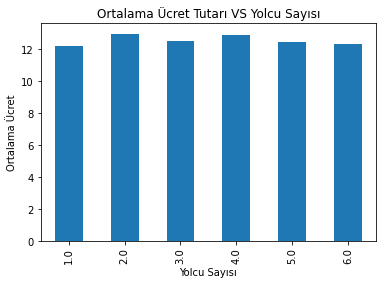

In [0]:
# Finding average fare amount with respect to passenger count

pdf.groupby('passenger_count')['fare_amount'].mean().plot(kind='bar')
plt.title("Ortalama Ücret Tutarı VS Yolcu Sayısı")
plt.xlabel("Yolcu Sayısı")
plt.ylabel("Ortalama Ücret")
plt.show()

In [0]:
#Varsayım
#Hipotez: Yolcu sayısına göre ücret artacaktır.
#Ancak yolcu sayısı 6 nın ortalama ücret miktarı diğerlerine göre yüksektir. Bu oldukça belirgindir, ancak diğer yandan ortalama ücret tutarı, yolcu sayısı 3,4 ve 5 için #karşılaştırmalı olarak o kadar yüksek olmayacaktır.

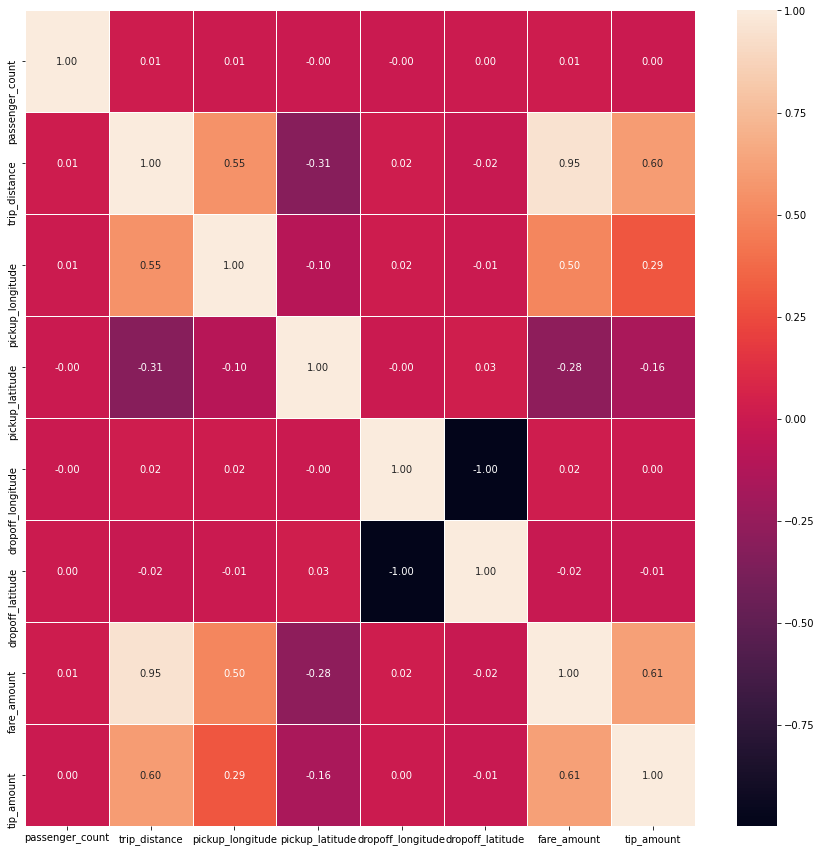

In [0]:
import seaborn as sb

f,ax = plt.subplots(figsize=(15, 15))
sb.heatmap(pdf.corr(), annot=True, linewidths=.9, fmt= '.2f',ax=ax)
plt.show()

Out[268]: Text(0, 0.5, 'Yolculuk Ücreti')

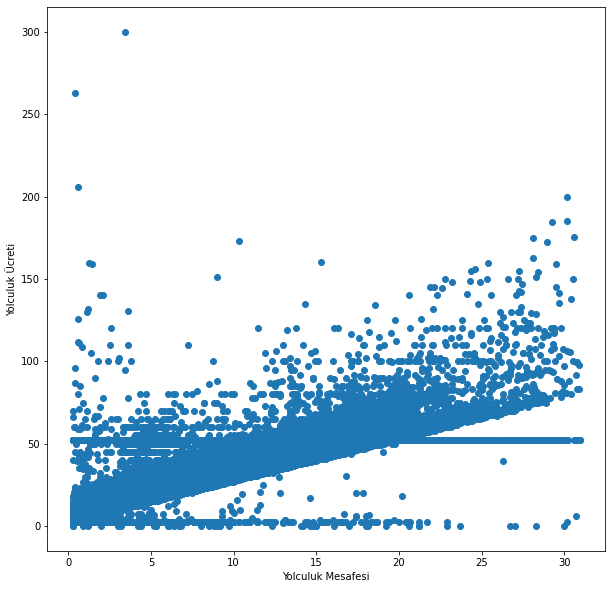

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(pdf["trip_distance"],pdf["fare_amount"])
plt.xlabel("Yolculuk Mesafesi")
plt.ylabel("Yolculuk Ücreti")

###Doğrusal Regresyon -Linear Regression
Doğrusal Regresyon ile tahmin modeli oluşturmak için scikitlearn kütüphanesinden train_test_split ile tüm verinin %20'si test olacak şekilde rastgele olarak veri dağıtma işlemi yapıldı.
Şimdi Linear Regression modeli seçilir ve bu yöntemle makine öğrenmesi gerçekleştirilir.

Nitelikler Arasındaki Korelasyon
Aşağıdaki gösterildiği gibi, şaşırtıcı olmayan bir şekilde, “fare amount,” “tip amount,” “total amount,” “distance,” ve “trip minute” gibi nitelikler arasındaki korelasyon katsayısı, bu nitelikler arasında pozitif bir ilişki olduğunu göstermektedir.

In [0]:
#Veri setimizde 7 bağımsız özellik ve 1 Bağımlı özellik olmak üzere 8 özelliğimiz var.
#Bağımsız değişkenlerimiz
#x=pdf[["trip_distance","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","tip_amount","passenger_count"]]
x=pdf.drop(["fare_amount"], axis='columns')
#x
#Bağımlı değişkenimiz/ prediction
y=pdf[["fare_amount"]]
y

,fare_amount
0,5.0
1,20.0
2,9.5
3,6.5
4,20.0
...,...
1022069,6.5
1022070,4.0
1022071,5.0
1022072,9.5


In [0]:

#Model Building
from sklearn.model_selection import train_test_split

#Artık temiz bir veri setimiz olduğuna göre, taksi ücretini tahmin etmek için bir model eğitmeye hazırız. Bunu yapmadan önce, veri setini bir trene (%80) ve teste (%20) böleceğiz.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

#Learning
x_train
y_train
#Controling
x_test
y_test

from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(x_train,y_train)

#prediction
tahmin=lr.predict(x_test)
tahmin

#real data
y_test

#coefficient β0 katsayısını çağırmak için:
print ('Coefficients: \n',lr.intercept_)

#β1 katsayısını çağırmak için:
print ('Coefficients: \n',lr.coef_)

#R2 değeri
df=lr.score(x_test,y_test)
print(df)
#
dff=lr.score(x_train,y_train)
print(dff)

np.mean(tahmin-y_test)

Coefficients: 
 [-1188.76700591]
Coefficients: 
 [[-4.76229359e-03  2.73091140e+00 -1.11033932e+01  9.14895961e+00
  -2.77013082e+00 -5.05567456e+00  2.55042312e-01]]
0.9159897247516796
0.9110868729524674
Out[270]: fare_amount    0.00258
dtype: float64

In [0]:
#Doğrusal Regresyon modeli için RMSE
from sklearn.metrics import mean_squared_error
y_pred=np.round(lr.predict(x_test),2)
lr_mse=mean_squared_error(y_pred, y_test)
lr_rmse=np.sqrt(mean_squared_error(y_pred, y_test))
lr_train_rmse=np.sqrt(mean_squared_error(lr.predict(x_train), y_train))


print("Tahmin ",y_pred)
print("Test MSE for Linear Regression is ",lr_mse)
print("Test RMSE for Linear Regression is ",lr_rmse)
print("Train RMSE for Linear Regression is ",lr_train_rmse)


Tahmin  [[ 9.42]
 [11.24]
 [ 6.21]
 ...
 [ 6.91]
 [17.64]
 [15.52]]
Test MSE for Linear Regression is  8.074300779297019
Test RMSE for Linear Regression is  2.841531414448381
Train RMSE for Linear Regression is  2.927560763452582


/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[272]: Text(0.5, 0, 'Yolculuk Mesafesi')

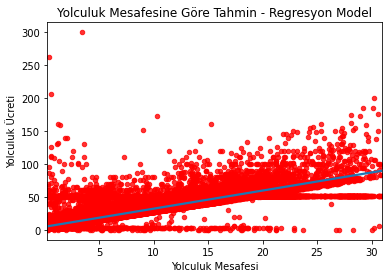

In [0]:
g= sns.regplot(pdf["trip_distance"], pdf["fare_amount"],ci=None,scatter_kws={'color':'r','s':20})
g.set_title("Yolculuk Mesafesine Göre Tahmin - Regresyon Model")
g.set_ylabel("Yolculuk Ücreti")
g.set_xlabel("Yolculuk Mesafesi")

###Random Forest Regression

In [0]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
# create regressor object
rf = RandomForestRegressor(n_estimators = 100, random_state = 42,n_jobs=-1)
rf.fit(x_train,y_train)
rf_pred= rf.predict(x_test)
rf_rmse=np.sqrt(mean_squared_error(rf_pred, y_test))
rf_mse=mean_squared_error(rf_pred, y_test)
print("Prediction",rf_pred)
print("Test MSE for Random Forest is",rf_mse)
print("RMSE for Random Forest is ",rf_rmse)

#R2 değeri
df=rf.score(x_test,y_test)
print(df)

/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_sklearn.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  original_result = original(self, *args, **kwargs)
Prediction [ 9.82  10.96   5.78  ...  7.035 18.945 13.555]
Test MSE for Random Forest is 4.2572081343950146
RMSE for Random Forest is  2.06330030155453
0.9557051762477063


###Gradient Boost Regression

In [0]:
#Gradient Boost Regression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
# Create Training and Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.1)
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
rmse=np.sqrt(mean_squared_error(y_test, gbr.predict(X_test_std)))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Gradient Boost Regression (RMSE) on test set: {:.4f}".format(rmse))

/databricks/python/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Model Accuracy: 0.949
The mean squared error (MSE) on test set: 4.8692
Gradient Boost Regression (RMSE) on test set: 2.2066


In [0]:
###Regression Toward the Mean - ortalamaya doğru regresyon

In [0]:
import numpy as np

class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)


mean_model = MeanRegressor()

mean_model.fit(x, y)

mean_model.mean

train_preds = mean_model.predict(x)

In [0]:
val_preds = mean_model.predict(y)
val_preds[0]

Out[277]: 12.331690464682598